<a href="https://colab.research.google.com/github/harabou/NCD_biostat/blob/main/%2302_ttest_chi_square_NCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to GoogleDrive where data is stored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#１．t-test/Wilcoxon test
## Darwin corn Data

##１）Module



In [ ]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/darwin2.csv'
#１行目（pythonでは0行と指定）を見出しにする。日本語を含むためエラーが出ることが多いので、[Shift-jis]で読み込み
df = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

##2)Check the status of the dataset Read the first 5 rows

In [ ]:
df.head()

,A,B
0,23.500,17.375
1,12.000,20.375
2,21.000,20.000
3,22.000,20.000
4,19.125,18.375


##3)Descriptive statistics

In [ ]:
df.describe()

,A,B
count,15.000000,15.000000
mean,20.191667,17.575000
std,3.616945,2.051676
min,12.000000,12.750000
25%,19.750000,16.375000
50%,21.500000,18.000000
75%,22.125000,18.625000
max,23.500000,20.375000


##4)t-test

In [ ]:
t,p = stats.ttest_ind(df['A'],df['B'],
                     equal_var=False)
p

0.023282559951189632

##5)Wilcoxon test（Mann-Whitney U test）

In [ ]:
t,p = stats.mannwhitneyu(df['A'],df['B'],alternative='two-sided')
p

0.002608089202411852

2.Outlier effect

dataset pattern 1

In [ ]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/outl1.csv'
#１行目（pythonでは0行と指定）を見出しにする。日本語を含むためエラーが出ることが多いので、[Shift-jis]で読み込み
outl1 = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
outl1.head()

,A,B
0,1,5
1,2,5
2,2,6
3,3,7
4,4,8


In [ ]:
t,p = stats.ttest_ind(outl1['A'],outl1['B'],
                     equal_var=False)
p

0.001247205234935239

In [ ]:
t,p = stats.mannwhitneyu(outl1['A'],outl1['B'],alternative='two-sided')
p

0.011667312343319386

dataset pattern 2　（8⇒80にする）

In [ ]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/outl2.csv'
#１行目（pythonでは0行と指定）を見出しにする。日本語を含むためエラーが出ることが多いので、[Shift-jis]で読み込み
outl2 = pd.read_csv(fpath,header=0, encoding='shift-jis')

In [ ]:
outl2.head()

,A,B
0,1,5
1,2,5
2,2,6
3,3,7
4,4,80


In [ ]:
t,p = stats.ttest_ind(outl2['A'],outl2['B'],
                     equal_var=False)
p

0.2878053577118061

In [ ]:
t,p = stats.mannwhitneyu(outl2['A'],outl2['B'],alternative='two-sided')
p

0.011667312343319386

#2 Chi-square test

In [ ]:
import pandas as pd
fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/rheu.csv'
#１行目（pythonでは0行と指定）を見出しにする。日本語を含むためエラーが出ることが多いので、[Shift-jis]で読み込み
rheu = pd.read_csv(fpath,header=0, encoding='shift-jis')
rheu.head()

,ID,sex,Drug,Response
0,1,1,A,1
1,2,1,A,1
2,3,1,A,1
3,4,1,A,1
4,5,1,A,1


In [ ]:
cross_rheu = pd.crosstab(rheu['Drug'],rheu['Response'])
cross_rheu

Response,0,1
Drug,,
A,13,28
P,29,14


In [ ]:
chi2, p, dof, ef=stats.chi2_contingency(cross_rheu, correction=False)
chi2, p, dof

(10.720363017583665, 0.0010596288112611483, 1)

#3 McNemar検定

In [ ]:
import pandas as pd
from scipy import stats
!pip install statsmodels
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar


fpath = 'https://raw.githubusercontent.com/harabou/DS-AI_course/main/%2301/lowback_obs.csv'
#１行目（pythonでは0行と指定）を見出しにする。日本語を含むためエラーが出ることが多いので、[Shift-jis]で読み込み
LB = pd.read_csv(fpath,header=0, encoding='shift-jis')
LB.head()

,ID,A,B
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [ ]:
cross_LB = pd.crosstab(LB['A'],LB['B'])
cross_LB

In [ ]:
# Assuming 'cross_LB' is your contingency table
result = mcnemar(cross_LB, exact=False, correction=True) # Use the function 'mcnemar' within the module
print(result)

# Report

小学生１００名に対して、お父さんとお母さん、どちらに悩みを相談しやすいですか？という調査を実施したところ、下記の結果を得た。カイ２乗検定、 McNemar検定をそれぞれ実施し、今回の設定においては、 McNemar検定が正しい解析であることを確認しなさい。
→カイ２乗検定では結果の判断を誤ることがわかるはず。

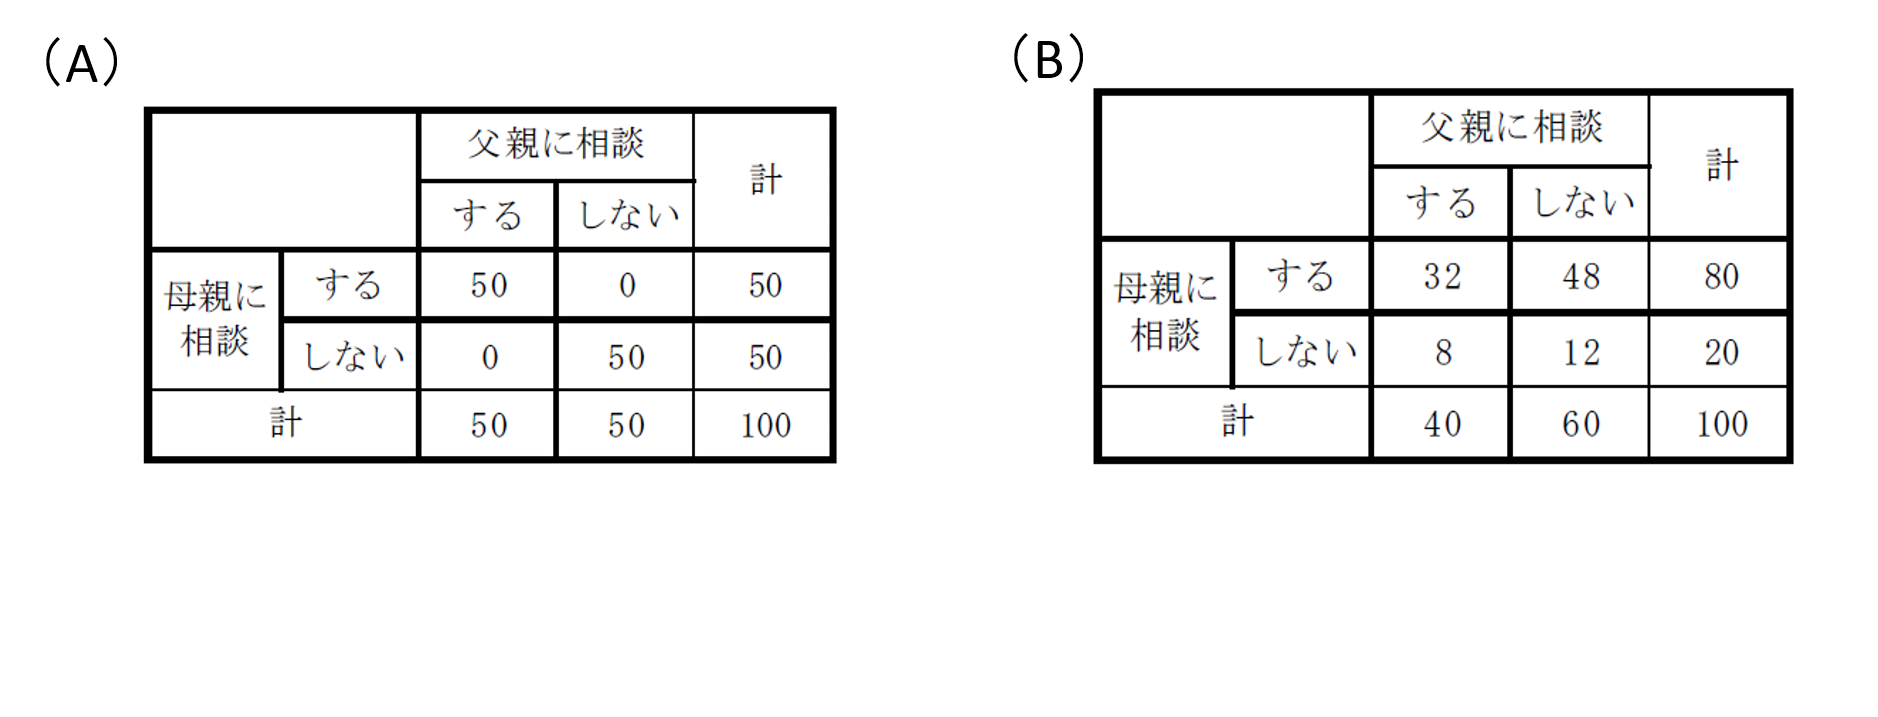

In [ ]:
import scipy
import scipy.stats as st

data = [[50, 0], [0, 50]]

p_m_result = mcnemar(data, exact=False, correction=True) # Use the function 'mcnemar' within the module
p_chi_result = st.chi2_contingency(data) # Use the function 'chisqr' within the module

print(p_chi_result)
print(p_m_result)

Chi2ContingencyResult(statistic=96.04, pvalue=1.1258564622753109e-22, dof=1, expected_freq=array([[25., 25.],
       [25., 25.]]))
pvalue      0.0
statistic   inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/contingency_tables.py:1348: RuntimeWarning: divide by zero encountered in scalar divide
  statistic = (np.abs(n1 - n2) - corr)**2 / (1. * (n1 + n2))


In [ ]:
import scipy
import scipy.stats as st

data = [[32, 48], [8, 12]]
p_m_result = mcnemar(data, exact=False, correction=True) # Use the function 'mcnemar' within the module
p_chi_result = st.chi2_contingency(data) # Use the function 'chisqr' within the module

print(p_chi_result)
print(p_m_result)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[32., 48.],
       [ 8., 12.]]))
pvalue      1.8722471604280863e-07
statistic   27.160714285714285
